# HOMEWORK 1 Solutions

## Question 1:

[1 point] What are extensive vs. intensive thermodynamic properties? Give two examples of each. 

**Ans**

- Extensive property depends on the amount of matter in a sample. Mass and volume are examples of extensive properties. 

- Intensive property depends only on the type of matter in a sample and not on the amount. Temperature and pressure are examples of intensive properties. 

## Question 2:

[2 points] Draw a prototypical P-x-y diagram for a binary mixture "by hand". Component (1) is more volatile than the component (2), you can choose arbitrary values for saturation pressures. 

(a) Identify the saturation pressures, the bubble line, and the dew line. 

(b) Graphically, find the pressure range where two phases are expected.

(c) Draw a tie-line at a pressure that's the mean of the individual saturations pressures, P = (P1_sat + P2_sat)/2. What are the compositions of the two phases (i.e., x_1 and y_1) that are in equilibrium? 

Note: Estimates are fine, we're engineers. 

**Ans**

![Question 2](HW1_answer2.jpg)

## Question 3:

[2 points] Write the expression for Raoult's law. Explain (in words) why y_i is directly proportional to x_i and Pi^sat.
You may find Section 12.1 and 13.3 of the textbook (it's on Canvas) useful. Do not be scared of the other stuff. Good luck! 



**Ans**

![Question 3](HW1_answer3.jpg)

## Question 4:

[2 points] Pick a less-popular compound from Table B.2 (pg. 653, Appendix B) of the textbook. Plot the saturation pressure vs. temperature using Python. Graphically, estimate the boiling point temperature at 0.1 bare, 1 bar, and 10 bar. What do you conclude? 

Note: -5 points if you choose methanol, ethanol, water, or methyl acetate. Be creative! You can use the notebooks available on Canvas as the starting point. 

**Ans**

Chosen compound: Acetone

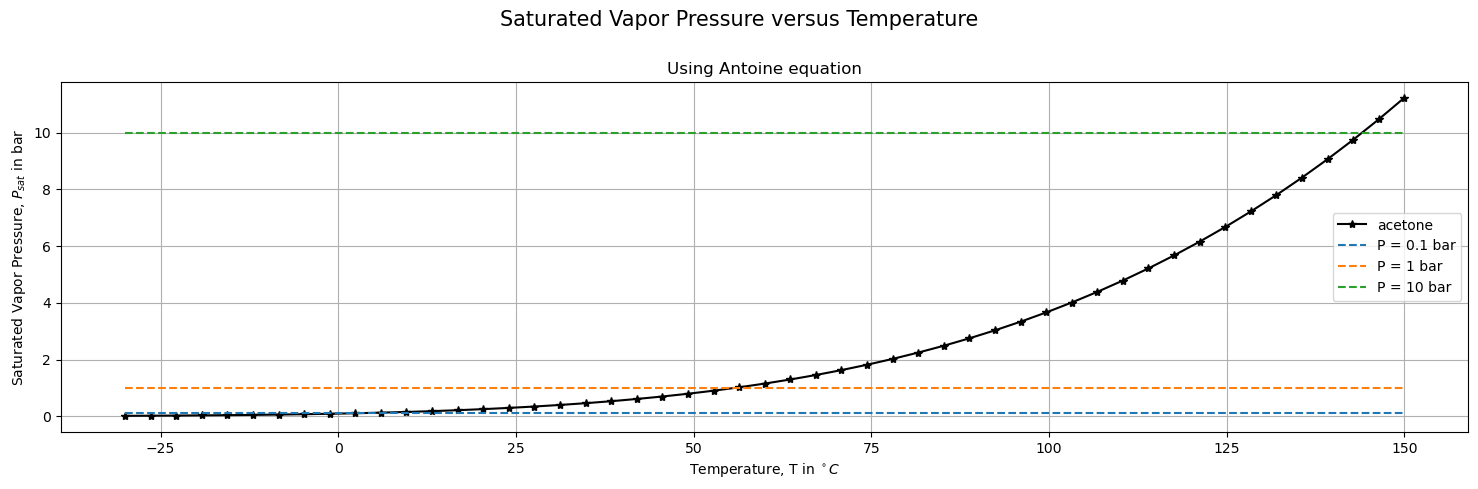

In [1]:
import numpy as np
import matplotlib.pyplot as plt


ant_coeff= {"acetone" : (14.3145, 2756.22, 228.060)}  # T needs to be in celcius and P_sat is in kPa

P_req= [0.1, 1, 10]  # note, unit is in bar
T_min= -30  # in degree celcius
T_max= 150  # in degree celcius

def compute_Psat(T, species):
    """Returns the saturated vapor pressure in bar. Needs species and temperature (in celcius) as input arguments."""
    A, B, C = ant_coeff[species]
    P_sat = np.exp(A - B/(T + C)) / 100  # divide by 100 to convert kPa to bar
    return np.round(P_sat, 3)

def plot_Psat(species, T_min, T_max, ax, n_pts=51):
    """Returns the plotting axis. Needs species, temperature range, and axis as arguments."""  
    T_arr = np.linspace(T_min, T_max, n_pts)
    P_arr = compute_Psat(T_arr, species)
    ax.plot(T_arr, P_arr, "k*-", label=f"{species}")
    ax.set_xlabel(f"Temperature, T in " + "$^\circ C$")
    ax.set_ylabel(f"Saturated Vapor Pressure, " + "$P_{sat}$" + f" in bar")
    ax.set_title(f"Using Antoine equation")
    return ax
    
def plot_pressure_lines(P_req, T_min, T_max, ax):
    for P in P_req:
        T_arr = np.linspace(T_min, T_max)
        P_arr = P*np.ones(len(T_arr))
        ax.plot(T_arr, P_arr, "--", label=f"P = {P} bar")
    return ax

fig, axis = plt.subplots(1, figsize=(15, 5))
axis = plot_Psat("acetone", T_min, T_max, ax=axis)
axis = plot_pressure_lines(P_req, T_min, T_max, ax=axis)
plt.suptitle(f"Saturated Vapor Pressure versus Temperature", fontsize=15)
fig.tight_layout(pad=1.5)
plt.legend()
plt.grid()
plt.show()

From the above plot, we can estimate graphically the boiling point temperatures as,

- **at 0.1 bar:** ~ $ 0 ^\circ C$

- **at 1 bar:** ~ $ 55 ^\circ C$

- **at 10 bar:** ~ $ 145 ^\circ C$

Note, the antoine coefficients used above for acetone works well for temperature in the range between $-26 ^\circ C$ to $77 ^\circ C$. So the boiling point estimated at 10 bar holds no physical significance. 

**Conclusion**: We find the saturated vapor pressure to exponentially increase as the boiling point temperature increases.

## Question 5:

[2 points] You take a flask of the chosen compound at the top of Mount Everest. What temperature does it boil at (i.e., from the liq to the vap phase)? 

**Ans**

Pressure at the top of Everest is [33.7 kPa or 0.337 bar](https://www.inspiritvr.com/general-chemistry/states-of-matter/air-pressure-at-mount-everest#:~:text=as%20atmospheric%20pressure.-,The%20atmospheric%20pressure%20at%20the%20peak%20of%20Mount%20Everest%20(elevation%208848%20m)%20is%20253%20mmHg.,-FAQs%3A). 

We can either solve analytically or with fsolve. Both the approaches are shown below,

**1) Analytical approach:**

We will recast the Antoine eqution to solve for T as shown below, 

$$ \ln P_{sat} = A - \frac {B}{T+C} $$

$$ => \frac {B}{T+C} = A - \ln P_{sat} $$

$$ => \frac {B}{A - \ln P_{sat}} = {T+C} $$

We have the required form, 

$$ T = \frac {B}{A - \ln P_{sat}} - C $$

Now by substituting the values, we find

(14.3145, 2756.22, 228.060)

$$ T = \frac {2756.22}{14.3145 - \ln (33.7)} - 228.060 = 27.216 \; ^\circ C $$

**2) fsolve approach:** (recommended)

In [2]:
from scipy.optimize import fsolve

Psat_everest = 0.337  # in bar

# note, compute_Psat will return the saturated pressure in the unit of bar
def find_BP(T, species):
    error = Psat_everest - compute_Psat(T, species)
    return error

ans = fsolve(find_BP, 0, args="acetone")
error_perc = (find_BP(ans[0], "acetone")/Psat_everest)*100
print(f"Required Boiling temperature using fsolve is {ans[0]:.3f} degree celcius with error of {error_perc:1.3f} %")

Required Boiling temperature using fsolve is 27.201 degree celcius with error of 0.000 %
